<a href="https://colab.research.google.com/github/kjmobile/B735/blob/main/3_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Customer Segmentation with KMeans Clustering

This notebook performs customer segmentation using the KMeans clustering algorithm.  
It includes data preprocessing, clustering, visualization, and interpretation of customer groups.  
The approach is unsupervised and reveals hidden patterns in customer behavior.

### Loading and previewing the dataset

Read customer data and display the first few rows for inspection.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Encoding categorical variables and checking correlations

Convert categorical gender into numeric values for analysis,  
then compute pairwise correlations between features to inform later selection.


In [3]:
customer = data.copy()
customer['Gender'] = customer['Gender'].map({'Male': 0, 'Female': 1})
customer.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


### Visualizing feature distributions

Plot histograms and bar charts to understand the distribution of key numerical and categorical features.  
This helps inform decisions on scaling and feature selection for clustering.


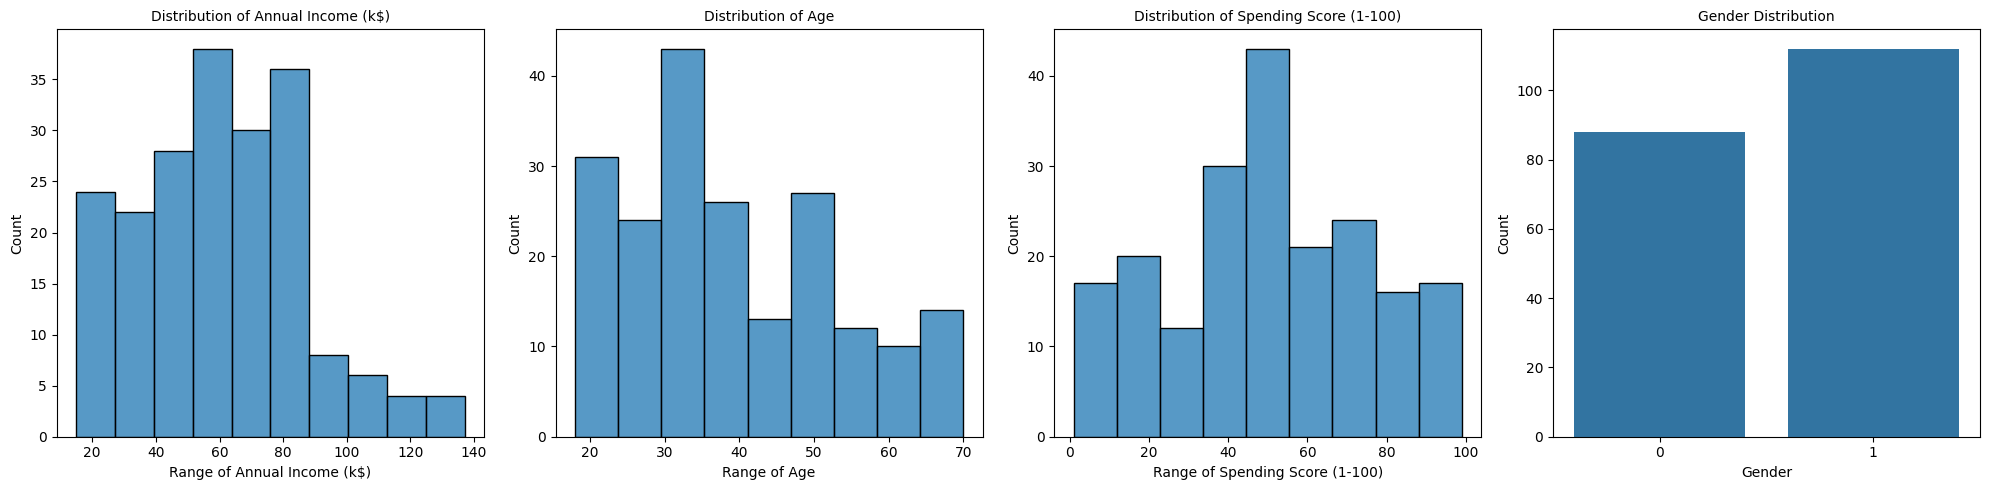

In [4]:

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
#plot1
sns.histplot(customer['Annual Income (k$)'], ax=axes[0])
axes[0].set_title('Distribution of Annual Income (k$)', fontsize=10)
axes[0].set_xlabel('Range of Annual Income (k$)')
axes[0].set_ylabel('Count')
#plot2
sns.histplot(customer['Age'], ax=axes[1])
axes[1].set_title('Distribution of Age', fontsize=10)
axes[1].set_xlabel('Range of Age')
axes[1].set_ylabel('Count')
#plot3
sns.histplot(customer['Spending Score (1-100)'], ax=axes[2])
axes[2].set_title('Distribution of Spending Score (1-100)', fontsize=10)
axes[2].set_xlabel('Range of Spending Score (1-100)')
axes[2].set_ylabel('Count')

#plot4
genders = customer.Gender.value_counts()
sns.barplot(x=genders.index, y=genders.values, ax=axes[3])
axes[3].set_title('Gender Distribution', fontsize=10)
axes[3].set_xlabel('Gender')
axes[3].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [5]:
df1=customer[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

Run KMeans to identify customer segments based on selected features.

In [6]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

### Visualizing customer segments

Plot customers by cluster to visually inspect the segmentation.

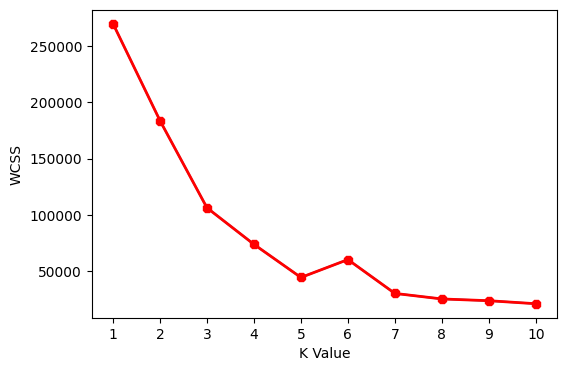

In [7]:
#The elbow curve
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### Adding cluster labels to dataset

Assign cluster IDs to each customer and merge with original data.


In [8]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,2
1,2,0,21,15,81,3
2,3,1,20,16,6,2
3,4,1,23,16,77,3
4,5,1,31,17,40,2


### Visualizing customer segments

Plot customers by cluster to visually inspect the segmentation.


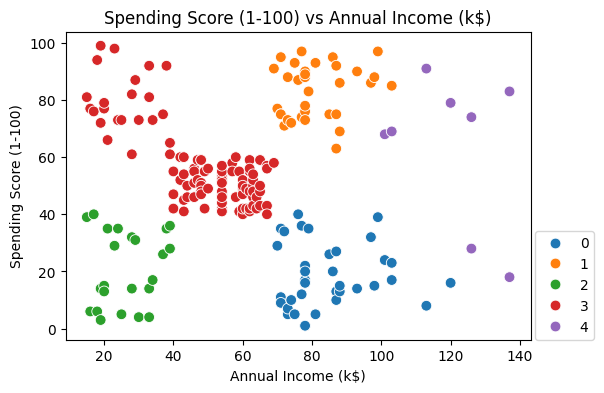

In [9]:
#Scatterplot of the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette='tab10', legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=(1.01,0))
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Choosing the optimal number of clusters (Elbow Method)

Apply KMeans clustering for different values of k (1 to 10) and calculate the Within-Cluster Sum of Squares (WCSS).  
Plot the WCSS values to identify the “elbow point,” where adding more clusters doesn’t significantly reduce the error.


| Metric | Formula | Measures | Depends On | Scale |
|--------|---------|----------|------------|-------|
| **WCSS** | $\sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2$ | Total within-cluster variation | Number of points and dimensional scale | Large (sum of squared distances) |
| **WCV** | $\dfrac{\text{WCSS}}{N}$ | Average within-cluster variation per point | Normalized by number of points | Smaller, scale-invariant |


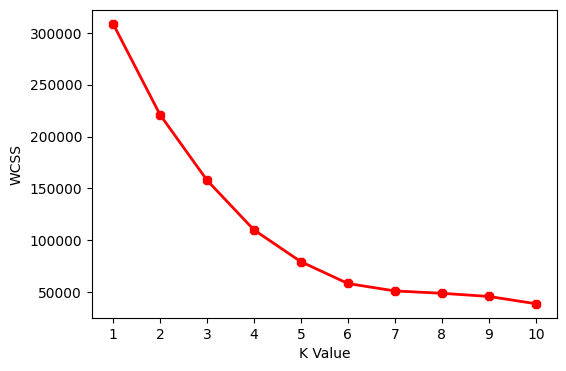

In [10]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [11]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,9
1,2,0,21,15,81,0
2,3,1,20,16,6,9
3,4,1,23,16,77,0
4,5,1,31,17,40,9


### Visualizing customer clusters in 3D

Plot the clusters in 3D space using Age, Annual Income, and Spending Score.  
Each color represents a different cluster for visual interpretation.


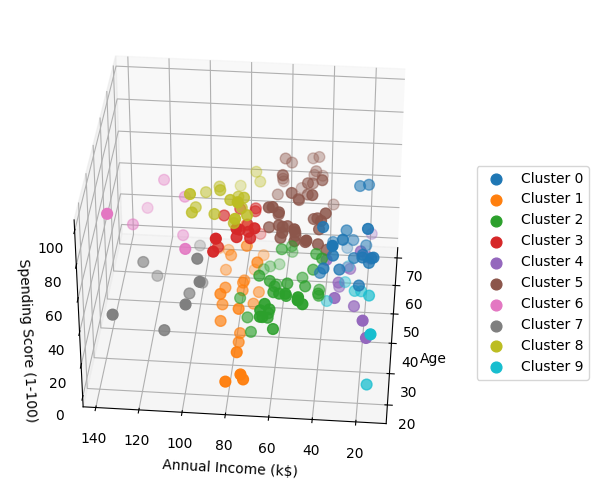

In [12]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': '3d'})

for label in sorted(df1.label.unique()):
    mask = df1.label == label
    color = plt.cm.tab10(label % 10)
    ax.scatter(df1.Age[mask], df1["Annual Income (k$)"][mask], df1["Spending Score (1-100)"][mask],
              color=color, s=60, label=f'Cluster {label}')

ax.view_init(35, 185)
plt.xlabel("Age"), plt.ylabel("Annual Income (k$)"), ax.set_zlabel('Spending Score (1-100)')
ax.legend(loc=(1.01,.2))
plt.show()

### Exploring customers within each cluster

Loop through each cluster and display:
- the number of customers in each group, and
- the list of Customer IDs in that cluster.

This allows closer inspection of customer segmentation results.


In [13]:
for i, label in enumerate(sorted(df1["label"].unique())):
    # Get customers for this label
    customers = df1[df1["label"] == label]

    ordinal = {0: '1st', 1: '2nd', 2: '3rd'}.get(i, f'{i+1}th')
    print(f'Number of customers in {ordinal} group = {len(customers)}')
    print(f'They are - {customers["CustomerID"].values}')
    print('-' * 44)

Number of customers in 1st group = 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customers in 2nd group = 25
They are - [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179]
--------------------------------------------
Number of customers in 3rd group = 37
They are - [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 125 133
 143]
--------------------------------------------
Number of customers in 4th group = 15
They are - [123 126 130 132 134 138 140 148 154 158 160 166 170 172 178]
--------------------------------------------
Number of customers in 5th group = 13
They are - [ 7  9 11 13 15 19 23 25 31 33 35 37 45]
--------------------------------------------
Number of customers in 6th group = 45
They are - [ 41  43  47  51  54  55  56  57  58  60  61  63  64  6